# Linear Regression

## Dataset: Lung Capacity Data
The dataset which we are working on is related to Lung Capacity and its name is 'LungCapData'. 
This dataset consists of 6 variables, namely, 'LungCap', 'Age', 'Height', 'Smoke', 'Gender', 'Caesarean'.
Numerical variables are:- 'LungCap', 'Age', 'Height'
Categorical variables are:- 'Smoke', 'Gender', 'Caesarean'

## The problem statement
We have the capacity of lungs of numerous people of various age groups, height, if they smoke, their gender and caesarean. Based on these facts and numbers, we have to build an algorithm to predict the appropriate capacity of lungs of these people.

## Import the libraries

In [30]:
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis
from scipy.stats import skew

## Import the dataset

In [31]:
lc = pd.read_csv(r"LungCapData.csv")

In [32]:
# to see first five observations and name of the variables
lc.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [33]:
# to see the name of variables
lc.columns

Index(['LungCap', 'Age', 'Height', 'Smoke', 'Gender', 'Caesarean'], dtype='object')

In [34]:
# to see the dimension of the dataset
lc.shape

(725, 6)

## Data pre-processing

In [35]:
# check the nulls
lc.isnull().sum()
# here, the dataset doesn't contain any nulls

LungCap      0
Age          0
Height       0
Smoke        0
Gender       0
Caesarean    0
dtype: int64

In [36]:
# to check the datatype of each variable
lc.dtypes
# float64, int64 datatype means numerical data and object datatype means categorical data

LungCap      float64
Age            int64
Height       float64
Smoke         object
Gender        object
Caesarean     object
dtype: object

In [37]:
# encode the categorical data to numerical data
lc.replace({"Smoke" : {"no" : 0, "yes" : 1},
            "Gender" : {"female": 1, "male" : 0},
            "Caesarean" : {"no" : 0, "yes" : 1}}, inplace = True)

In [38]:
# check if the data is encoded
lc.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,0,0
1,10.125,18,74.7,1,1,0
2,9.550,16,69.7,0,1,1
3,11.125,14,71.0,0,0,0
4,4.800,5,56.9,0,0,0


## sampling and splitting the dataset

In [39]:
# before splitting the dataset, make a copy of dataset
# this will come handy while building multiple models
lc1 = lc.iloc[:,:]

In [40]:
# check if the copy is made
lc1.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,0,0
1,10.125,18,74.7,1,1,0
2,9.550,16,69.7,0,1,1
3,11.125,14,71.0,0,0,0
4,4.800,5,56.9,0,0,0


In [15]:
# import train_test_split function
from sklearn.model_selection import train_test_split

In [16]:
# define independent variables(x) and dependent variable(y)
lc1_x = lc1.iloc[ : , 1 : ]
lc1_y = lc1.iloc[ : , 0 ]

In [17]:
# split the data
lc1_x_train, lc1_x_test, lc1_y_train, lc1_y_test = train_test_split(lc1_x, lc1_y, test_size = 0.2, random_state = 555)

## Build the Linear Regression model

In [18]:
# import linear regression function
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [19]:
# build the model
reg.fit(lc1_x_train, lc1_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predict the test set results

Create a dataframe showing predicted and actual values of test set

In [20]:
# predict the test set results
pred_test = reg.predict(lc1_x_test)
df_test = pd.DataFrame({"Predicted":pred_test, "Actual":lc1_y_test})
print(df_test)

Predicted  Actual
182  10.148614  10.475
633   9.673881  10.200
357   8.058507   8.325
34    8.883307   8.650
91    9.593645   9.200
..         ...     ...
92    9.889295   9.750
273   6.417690   6.975
248  10.952850  10.700
594   7.377516   7.825
291  10.410207  10.450

[145 rows x 2 columns]


## Check the accuracy of test set

Firstly, find the value of R-square and Adjusted R-square:-

In [21]:
Rsq_test = reg.score(lc1_x_test, lc1_y_test)
N = len(lc1_x_test)
K = len(lc1_x_test.columns)
adj_Rsq_test = 1 - (1-Rsq_test)*(N-1) / (N-K-1)
print("R square of the test set is ", Rsq_test)
print("Adjusted R square of the test set is ", adj_Rsq_test)

R square of the test set is  0.8500039645688837
Adjusted R square of the test set is  0.8446084237260378


Now, find:- 
1. Mean of square of errors 
2. Root of mean of square of errors
3. Mean absolute error
4. Mean absolute percentage error

In [22]:
error_test = lc1_y_test - pred_test
sq_err = error_test * error_test
sq_err
MSE = np.mean(sq_err)
MSE
RMSE = np.sqrt(MSE)
RMSE
abs_err = np.absolute(error_test)
MAE = np.mean(abs_err)
MAE
MAPE = np.mean((abs_err/lc1_y_test) *100)
MAPE
print("Mean square of errors is ", MSE)
print("Root mean square of errors is ", RMSE)
print("Mean absolute error is ", MAE)
print("Mean absolute percentage error is ", MAPE)

Mean square of errors is  1.027120183339443
Root mean square of errors is  1.0134693795766319
Mean absolute error is  0.8058621128417005
Mean absolute percentage error is  13.911685115598644


## Predict the training set results

Create a dataframe showing predicted and actual values of training set

In [23]:
# predict the training set results
pred_train = reg.predict(lc1_x_train)
df_train = pd.DataFrame({"Predicted":pred_train, "Actual":lc1_y_train})
print(df_train)

Predicted  Actual
638   7.304335   5.025
80    7.192801   7.350
302   6.392245   6.550
131  11.352075  12.925
538  10.748561  12.325
..         ...     ...
381   5.935524   7.375
580   5.518509   5.150
33    8.230105  11.025
686   8.372186   6.150
410   4.978624   5.650

[580 rows x 2 columns]


## Check the accuracy of training set

Firstly, find the value of R-square and Adjusted R-square:-

In [24]:
Rsq_train = reg.score(lc1_x_train, lc1_y_train)
N = len(lc1_x_train)
K = len(lc1_x_train.columns)
adj_Rsq_train = 1 - (1-Rsq_train)*(N-1) / (N-K-1)
print("R square of the train set is ", Rsq_train)
print("Adjusted R square of the train set is ", adj_Rsq_train)

R square of the train set is  0.8541440258789037
Adjusted R square of the train set is  0.852873503456246


Now, find:- 
1. Mean of square of errors 
2. Root of mean of square of errors
3. Mean absolute error
4. Mean absolute percentage error

In [25]:
error_train = lc1_y_train - pred_train
sq_err = error_train * error_train
sq_err
MSE = np.mean(sq_err)
MSE
RMSE = np.sqrt(MSE)
RMSE
abs_err = np.absolute(error_train)
MAE = np.mean(abs_err)
MAE
MAPE = np.mean((abs_err/lc1_y_train) *100)
MAPE
print("Mean of square of errors is ", MSE)
print("Root of mean of square of errors is ", RMSE)
print("Mean absolute error is ", MAE)
print("Mean absolute percentage error is ", MAPE)

Mean of square of errors is  1.038042285480117
Root of mean of square of errors is  1.0188436020705616
Mean absolute error is  0.8295872399618897
Mean absolute percentage error is  13.29876769038133


## Some essential checkpoints

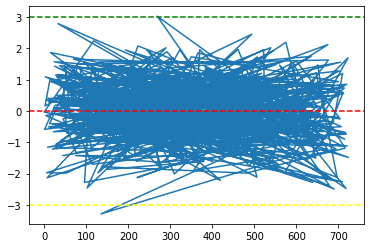

In [26]:
# homoscedasticity
plt.plot(error_train)
plt.axhline(y = 0, linestyle = "--", color = "red")
plt.axhline(y = 3, linestyle = "--", color = "green")
plt.axhline(y = -3, linestyle = "--", color = "yellow")

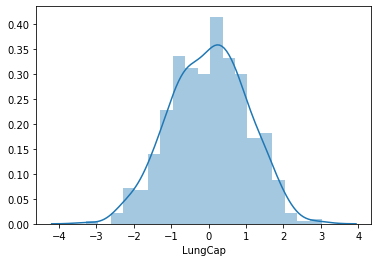

In [27]:
# distribution of errors
sns.distplot(error_train)

In [28]:
# skewness of errors
skew(error_train)

-0.07962536913697134

In [29]:
# kurtosis
kurtosis(error_train)

-0.29778533531520957

In Jupyter notebook, 0 value indicates the value of kurtosis equal to 3. Therefore, -0.29778533531520957 is close to 3.

# Conclusion

The algorithm which we built has:-

R square of the test set is  0.8500039645688837

Adjusted R square of the test set is  0.8446084237260378

and

R square of the train set is  0.8541440258789037

Adjusted R square of the train set is  0.852873503456246

The values of R square and Adjusted R square are good enough to say that the algorithm which we have built is good enough predict the Lung Capacity of people with an accuracy of 87% approximately.